## Table of contents
1. [Introduction](#introduction)
    1. [Install GeoPandas](#install)
2. [Reading Polygon Files](#Reading)
3. [Making Maps](#MakingMaps)
4. [Creating Point Geometry from Coordinates](#CreatePoint)
    1. [Import Lat/Long Data](#pointfile)
    2. [Create Your Geometry](#geometry)
    3. [Coordinate Reference System](#CRS)
    4. [Create a geodataframe](#point_gdf)
5. [Writing Files](#Write)

## 1. Introduction <a name="introduction"></a>

GeoPandas, as the name suggests, extends the infamous python library pandas by adding support for geospatial data. If you are not familiar with pandas, I recommend reading some of the literature before you begin, or, as I often do, refer to it as I'm coding.

The core data structure in GeoPandas is the geopandas.GeoDataFrame, a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations. The geopandas.GeoSeries, is a subclass of pandas.Series and is used to handle the geometries. Therefore, your GeoDataFrame is a combination of pandas.Series, with traditional data (numerical, boolean, text etc.), and geopandas.GeoSeries, with geometries (points, polygons etc.). You can have as many columns with geometries as you wish; there’s no limit typical for desktop GIS software.

<img src="https://geopandas.org/en/stable/_images/dataframe.svg" width="700" height="500" />
<center>https://geopandas.org/en/stable/getting_started/introduction.html</center>

Each GeoSeries can contain any geometry type (you can even mix them within a single array) and has a GeoSeries.crs attribute, which stores information about the projection (CRS stands for Coordinate Reference System). Therefore, each GeoSeries in a GeoDataFrame can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same geometry.

Only one GeoSeries in a GeoDataFrame is considered the active geometry, which means that all geometric operations applied to a GeoDataFrame operate on this active column.

### 1.1 Installing geopandas and dependant packages <a name="install"></a>

conda-forge is a community that provides conda packages for a wide range of software, including python. It provides the conda-forge package channel for conda from which packages can be installed, in addition to the “defaults” channel provided by Anaconda. Depending on what other packages you are working with, the defaults channel or conda-forge channel may be better for your needs (e.g. some packages are available on conda-forge and not on defaults).

https://anaconda.org/conda-forge/geopandas

GeoPandas and all its dependencies are available on the conda-forge channel, and can be installed as shown below. Before running the code, I created a new environment for python v3.10.4. If working on a earlier version, you may not get the latest geopandas (v0.11) and be unable to use the fun .explore() function talked about later.

In [2]:
conda install -c conda-forge geopandas

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mfrie\anaconda3\envs\geo_pd

  added / updated specs:
    - geopandas



The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.21.1               |       h74325e0_3          49 KB  conda-forge
    boost-cpp-1.74.0           |       h9f4b32c_8        16.0 MB  conda-forge
    branca-0.5.0               |     pyhd8ed1ab_0          26 KB  conda-forge
    brotli-1.0.9               |       h8ffe710_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h8ffe710_7          21 KB  conda-forge
    brotlipy-0.7.0             |py310he2412df_1004         329 KB  conda-forge
    ca-certificates-2022.6.15  |       h5b45459_0         188 KB  conda-forge
    cairo-1.16.0               |    h0ac17fb_1011         2.2 MB  conda-forg



requests-2.28.1      | 53 KB     |            |   0% 
requests-2.28.1      | 53 KB     | ###        |  30% 
requests-2.28.1      | 53 KB     | ########## | 100% 

brotli-bin-1.0.9     | 21 KB     |            |   0% 
brotli-bin-1.0.9     | 21 KB     | ########## | 100% 
brotli-bin-1.0.9     | 21 KB     | ########## | 100% 

libblas-3.9.0        | 5.6 MB    |            |   0% 
libblas-3.9.0        | 5.6 MB    | 3          |   3% 
libblas-3.9.0        | 5.6 MB    | 9          |  10% 
libblas-3.9.0        | 5.6 MB    | #4         |  15% 
libblas-3.9.0        | 5.6 MB    | ##8        |  28% 
libblas-3.9.0        | 5.6 MB    | ###6       |  36% 
libblas-3.9.0        | 5.6 MB    | ####8      |  48% 
libblas-3.9.0        | 5.6 MB    | #####7     |  58% 
libblas-3.9.0        | 5.6 MB    | ######7    |  67% 
libblas-3.9.0        | 5.6 MB    | #######6   |  77% 
libblas-3.9.0        | 5.6 MB    | ########6  |  86% 
libblas-3.9.0        | 5.6 MB    | #########5 |  95% 
libblas-3.9.0        | 5

mkl-2022.1.0         | 182.7 MB  | ########1  |  81% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  81% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  81% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########1  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  82% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  83% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  83% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  83% 
mkl-2022.1.0         | 182.7 MB  | ########2  |  83% 
mkl-2022.1.0         | 182.7 MB  | ########3  |  83% 
mkl-2022.1.0         | 182.7 MB  | ########3  |  83% 
mkl-2022.1.0         | 182.7

boost-cpp-1.74.0     | 16.0 MB   | 2          |   3% 
boost-cpp-1.74.0     | 16.0 MB   | 5          |   5% 
boost-cpp-1.74.0     | 16.0 MB   | 7          |   7% 
boost-cpp-1.74.0     | 16.0 MB   | #          |  10% 
boost-cpp-1.74.0     | 16.0 MB   | #2         |  13% 
boost-cpp-1.74.0     | 16.0 MB   | #5         |  16% 
boost-cpp-1.74.0     | 16.0 MB   | #8         |  19% 
boost-cpp-1.74.0     | 16.0 MB   | ##2        |  22% 
boost-cpp-1.74.0     | 16.0 MB   | ##5        |  25% 
boost-cpp-1.74.0     | 16.0 MB   | ##8        |  28% 
boost-cpp-1.74.0     | 16.0 MB   | ###1       |  31% 
boost-cpp-1.74.0     | 16.0 MB   | ###4       |  35% 
boost-cpp-1.74.0     | 16.0 MB   | ###8       |  38% 
boost-cpp-1.74.0     | 16.0 MB   | ####1      |  42% 
boost-cpp-1.74.0     | 16.0 MB   | ####5      |  45% 
boost-cpp-1.74.0     | 16.0 MB   | ####8      |  48% 
boost-cpp-1.74.0     | 16.0 MB   | #####1     |  52% 
boost-cpp-1.74.0     | 16.0 MB   | #####5     |  55% 
boost-cpp-1.74.0     | 16.0 

## 2. Reading Polygon Files <a name="Reading"></a>

Assuming you have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), you can read it using geopandas.read_file(), which automatically detects the filetype and creates a GeoDataFrame. 

For this story, we use the scottish governement data zone file. Scottish Data Zones are the primary geography for the release of small area statistics in Scotland. They are composed of Census Output Areas and are large enough that statistics can be presented accurately without fear of disclosure and yet small enough that they can be used to represent communities. The boundary files are open source, available via my github in geojson format or via the scotgov spatial data portal as a shapefile (https://spatialdata.gov.scot/geonetwork/srv/api/records/7d3e8709-98fa-4d71-867c-d5c8293823f2)

In [1]:
import geopandas as gpd

In [2]:
poly_file = "SG_DataZone_Bdry_2011.geojson"
poly_gdf = gpd.read_file(poly_file)
poly_gdf

DataZone                 Name  TotPop2011  ResPop2011  HHCnt2011  \
0     S01006506          Culter - 01         872         852        424   
1     S01006507          Culter - 02         836         836        364   
2     S01006508          Culter - 03         643         643        340   
3     S01006509          Culter - 04         580         580        274   
4     S01006510          Culter - 05         644         577        256   
...         ...                  ...         ...         ...        ...   
6971  S01013477  Broxburn South - 06         605         605        303   
6972  S01013478   Broxburn East - 01         860         851        358   
6973  S01013479   Broxburn East - 02         786         781        428   
6974  S01013480   Broxburn East - 03         671         671        302   
6975  S01013481   Broxburn East - 04         451         451        189   

       StdAreaHa  StdAreaKm2    Shape_Leng    Shape_Area  \
0     438.880218    4.388801  11801.872345  4.388802e+06   
1      22.349739    0.223498   2900.406362  2.217468e+05   
2      27.019476    0.270194   3468.761949  2.701948e+05   
3       9.625426    0.096254   1647.461389  9.625426e+04   
4      18.007657    0.180076   3026.111412  1.800766e+05   
...          ...         ...           ...           ...   
6971   10.988164    0.109882   1775.782199  1.098816e+05   
6972   12.438169    0.124382   2319.192976  1.243817e+05   
6973   26.714576    0.267145   3234.544766  2.671458e+05   
6974    9.624700    0.096248   1598.577583  9.624701e+04   
6975  511.606694    5.116068  13900.390027  5.116067e+06   

                                               geometry  
0     MULTIPOLYGON (((-2.27749 57.09526, -2.27644 57...  
1     MULTIPOLYGON (((-2.27355 57.10448, -2.27333 57...  
2     MULTIPOLYGON (((-2.27444 57.10170, -2.27238 57...  
3     MULTIPOLYGON (((-2.26612 57.10132, -2.26599 57...  
4     MULTIPOLYGON (((-2.26014 57.10159, -2.26051 57...  
...                                                 ...  
6971  MULTIPOLYGON (((-3.46323 55.93433, -3.46319 55...  
6972  MULTIPOLYGON (((-3.48355 55.93732, -3.48354 55...  
6973  MULTIPOLYGON (((-3.46663 55.93627, -3.46652 55...  
6974  MULTIPOLYGON (((-3.46259 55.93774, -3.46243 55...  
6975  MULTIPOLYGON (((-3.44318 55.93923, -3.44284 55...  

[6976 rows x 10 columns]

## 3. Making Maps <a name="MakingMaps"></a>

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call GeoDataFrame.plot().

<AxesSubplot:>

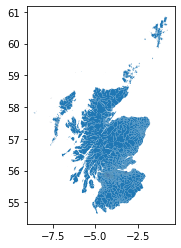

In [28]:
poly_gdf.geometry.plot()

You can also explore your data interactively using GeoDataFrame.explore(), which behaves in the same way plot() does but returns an interactive map instead.

In [24]:
poly_gdf.tail(500).explore()

## 4. Creating Point Geometry from Coordinates <a name="CreatePoint"></a>
Lets see how to create a GeoDataFrame when starting from a regular DataFrame that has coordinates in two columns.

### 4.1 Import Lat/Long Data <a name="pointfile"></a>
First we need to import out geographical data. In this case we are importing a csv file containing the entire UK postcode database, which is available opensource, via the office for national statistics (ONS).

https://geoportal.statistics.gov.uk/datasets/ons-postcode-directory-may-2022/about

The file contains lots of usefull information but is quite large, so when importing, we have specified which columns we require.

In [8]:
import pandas as pd

postcode_file = r"ONSPD_MAY_2022_UK.csv"

df_ONS_postcode = pd.read_csv(postcode_file, usecols = ["pcds", "lat", "long", "lsoa11"])

df_ONS_postcode

pcds     lsoa11        lat      long
0        AB1 0AA  S01006514  57.101474 -2.242851
1        AB1 0AB  S01006514  57.102554 -2.246308
2        AB1 0AD  S01006514  57.100556 -2.248342
3        AB1 0AE  S01006853  57.084444 -2.255708
4        AB1 0AF  S01006511  57.096656 -2.258102
...          ...        ...        ...       ...
2676235  ZE3 9JW  S01012387  59.873651 -1.305697
2676236  ZE3 9JX  S01012387  59.875286 -1.307502
2676237  ZE3 9JY  S01012387  59.891572 -1.313847
2676238  ZE3 9JZ  S01012387  59.892392 -1.310899
2676239  ZE3 9XP  S01012387  59.887104 -1.307578

[2676240 rows x 4 columns]

### 4.2 Create Your Geometry <a name="geometry"></a>

A GeoDataFrame needs a shapely object. We use points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects. We will use this to set it as a geometry while creating the GeoDataFrame. 

(note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])

In [29]:
from shapely.geometry import Point

geometry = gpd.points_from_xy(df_ONS_postcode.long, df_ONS_postcode.lat)

Methods for alternate data formats can be found via the links below.

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_geometry.html

### 4.3 Coordinate Reference System <a name="CRS"></a>
Each GeoSeries has its Coordinate Reference System (CRS) accessible at GeoSeries.crs. The CRS tells GeoPandas where the coordinates of the geometries are located on the earth’s surface. In some cases, the CRS is geographic, which means that the coordinates are in latitude and longitude. In those cases, its CRS is WGS84, with the authority code EPSG:4326. Let’s see the projection of our DataZone GeoDataFrame from section 2.

In [13]:
poly_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Our DataZone geometries are in EPSG:4326 with coordinates in degrees. If want a different CRS, we can easily re-project a GeoSeries to another using GeoSeries.to_crs(). In this case we are happy with the CRS, so when creating the point location geodataframe, we shall use the same projection.

In [14]:
crs = "EPSG:4326"

### 4.4 Create a GeoDataFrame <a name="point_gdf"></a>
Finally, we will create our GeoDataFrame using all the components we have produced (DataFrame, crs & geometry)

In [30]:
gdf_ONS_postcode = gpd.GeoDataFrame(df_ONS_postcode,
                                   crs = crs,
                                   geometry = geometry)

gdf_ONS_postcode.head(3)

pcds     lsoa11        lat      long                   geometry
0  AB1 0AA  S01006514  57.101474 -2.242851  POINT (-2.24285 57.10147)
1  AB1 0AB  S01006514  57.102554 -2.246308  POINT (-2.24631 57.10255)
2  AB1 0AD  S01006514  57.100556 -2.248342  POINT (-2.24834 57.10056)

In [31]:
gdf_ONS_postcode.head(100).explore()

## 5. Writing Files <a name="Write"></a>
To write a GeoDataFrame back to file use GeoDataFrame.to_file(). The default file format is Shapefile, but you can specify your own with the driver keyword. My personal preference is GeoJSON.

In [ ]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html
https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html
https://geopandas.org/en/stable/docs/user_guide/geocoding.html